Area Under Curve - Rceiver Operating Characteristic

True Positive rate vs False Positive rate to evaluate how well a model separates classes

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)

# model 1 guesses 1 every time
y_model_1 = np.array([1] * (n_0 + n_1))
y_pred_1 = y_model_1 > 0.5

print(f'accuracy score: {accuracy_score(y, y_pred_1)}')
cf_mat = confusion_matrix(y, y_pred_1)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

# we score a great overall accuracy score because the data is so skewed

accuracy score: 0.95
Confusion matrix
[[   0  500]
 [   0 9500]]
class 0 accuracy: 0.0
class 1 accuracy: 1.0


In [2]:
# below are the probabilities obtained from a hypothetical model that doesn't always predict the mode
y_model_2 = np.array(
    np.random.uniform(0, 0.75, n_0).tolist() +
    np.random.uniform(0.35, 1, n_1).tolist()
)
y_pred_2 = y_model_2 > .5

print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat = confusion_matrix(y, y_pred_2)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.7669
Confusion matrix
[[ 326  174]
 [2157 7343]]
class 0 accuracy: 0.652
class 1 accuracy: 0.7729473684210526


In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.5


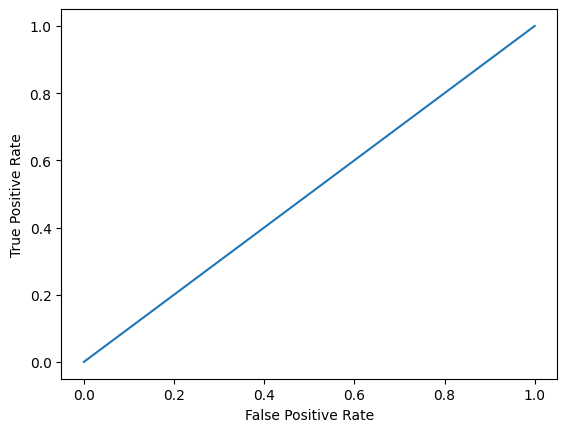

In [4]:
plot_roc_curve(y, y_model_1)
print(f'model 1 AUC score: {roc_auc_score(y, y_pred_1)}')

model 2 AUC score: 0.7124736842105263


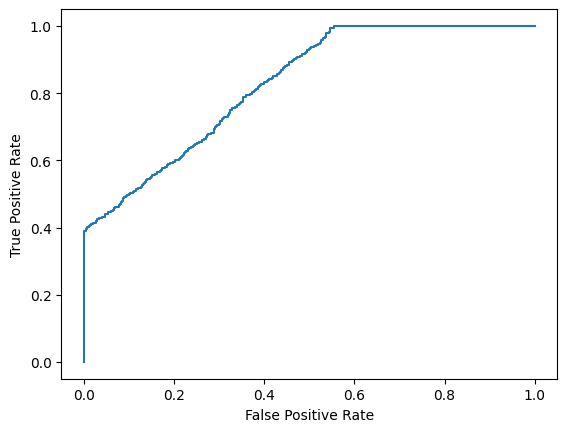

In [5]:
plot_roc_curve(y, y_model_2)
print(f'model 2 AUC score: {roc_auc_score(y, y_pred_2)}')